<a href="https://colab.research.google.com/github/yashah311/mlops/blob/main/Copy_of_Intro_to_Machine_Learning_classification_code_along.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification using SVMs


In this notebook we'll play around with how Machine learning models can perform classification tasks. In particular we'll explore SVM's. As with the regression module we'll employ some validation to ensure that our results generalize well. We'll also look into evaluation methods for classification models such as sensitivity, specificity and receiver operating characteristic curves. 

First, as always, import required libraries

In [1]:
from sklearn.datasets import make_classification 
import seaborn as sns 
import matplotlib as plt
import pandas as pd
import numpy as np



In [2]:
plt.style.use('seaborn')

## Importing Breast Cancer Dataset

In [3]:
# Import Cancer data from SKlearn library
# Datasets can be also found here: (http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29)

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


It's a good practice when working with new datasets is to perform some visualization. While we won't have the luxury to do this with high dimensional data which is probably most contexts in which classification is performed, playing with a low-dimensional case is good for building intuition:

Let's view the dataset as a table. Note that our target column is coded as binary "1, 0" for benign vs cancerious. Which makes this a binary classification problem.

In [4]:
df = pd.DataFrame (np.c_[cancer['data'],cancer['target']], 
                   columns = np.append (cancer['feature_names'], ['target']))

df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Scatterplots or pairplots are very useful to visualize all your parameters or features. You can also plot corrolations between your features to help you identify important features for hyperparameter tuning or feature engineering. Here, let's assume we decided that the 'mean radius' and the 'mean concavity' are the most important features for detecting cancerious from benign tumors. 

Text(0.5, 1.0, 'Raw data plot')

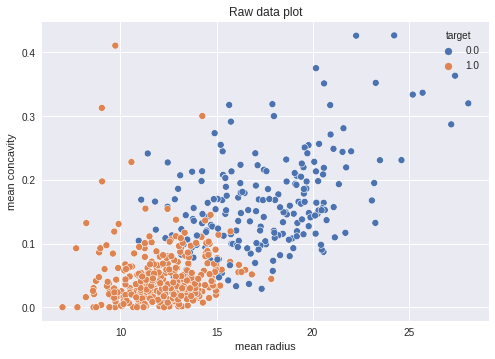

In [5]:
ax = sns.scatterplot(x='mean radius', y='mean concavity', data=df, hue='target', palette='deep')
ax.set_title('Raw data plot')

As you can see from the data there's some separation between both classes of the data. Our goal is to train a Support Vector Machine classifier to model the separation between the classes. As with most machine learning tools, <code>sklearn</code> also has a support vector machine classifier:

In [6]:
from sklearn.svm import SVC

In [7]:

svm = SVC(kernel='linear')

### Splitting your data into 'Training' and 'Testing' datasets

First let's split the dataset into a training and a testing set.

N.B. There are multiple ways by which you can split your data which can further explained in validation methods. The main purpose of spliting is that you are able to hold out some data for testing your model performance on new unseen data "for better generalizability".

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_train , df_test = train_test_split(df, test_size = 0.2 , random_state = 20 )

In [10]:
print ('Size of training "X" is', df_train.shape )
print ('\n')
print ('Size of test "X" is', df_test.shape )

Size of training "X" is (455, 31)


Size of test "X" is (114, 31)


## Training your model using the training dataset

In [11]:
svm.fit(df_train[['mean radius','mean concavity']],df_train['target'])

SVC(kernel='linear')

Now we can inspect from properties of this model to get a better idea about how it performed on our full dataset. First we'll visualize the dividing line generated by this model:

First, note that since this particular SVM is a linear model, fitting the model results in a linear model much like linear regression. The only difference being is that this line is designed to cut across two classes rather than to  minimize the mean squared error as we did with linear regression:

In [12]:
print (svm.intercept_)
print (svm.coef_)

[7.92142591]
[[-0.49583539 -4.49383393]]


Evaluation of the model requires us to write out the equation of the plane decided by the svm model and re-arrange the equation to solve for $x_1$ or $x_2$ (both are equivalent):

$$ax_1 + bx_2 + c = 0$$
$$x_2 = \frac{-ax_1 - c}{b}$$

In [13]:
evalX = np.linspace(11,18)
evaly = (-svm.coef_[0][0] * evalX - svm.intercept_) / svm.coef_[0][1]

Now that we've compute our linear boundary let's visualize what it looks like!

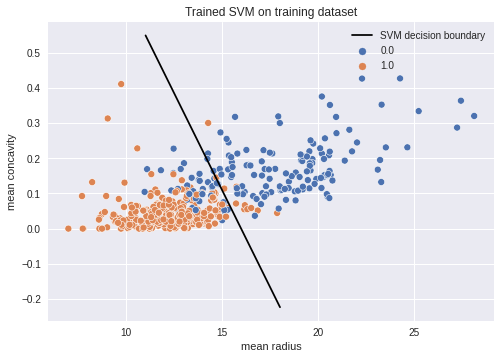

In [14]:
fig, ax = plt.pyplot.subplots()
ax = sns.scatterplot(x='mean radius', y='mean concavity', data=df_train, hue='target', palette='deep')
ax.plot (evalX, evaly, 'k' , label = ('SVM decision boundary'))
ax.set_title('Trained SVM on training dataset')
ax.legend()
plt.pyplot.show()

Furthermore, we can visualize which vectors were used as support vectors as well!

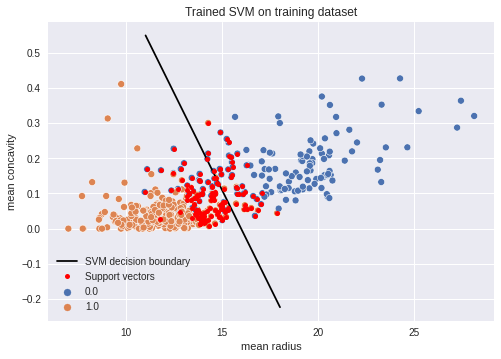

In [15]:
fig, ax = plt.pyplot.subplots()
ax = sns.scatterplot(x='mean radius', y='mean concavity', data=df_train, hue='target', palette='deep')
ax.plot (evalX, evaly, 'k' , label = ('SVM decision boundary'))
ax.plot (svm.support_vectors_[:,0], svm.support_vectors_[:,1], 'r.',markersize=10, label = ('Support vectors ') )
ax.set_title('Trained SVM on training dataset')
ax.legend()
plt.pyplot.show()

We can also plot the margins used in the SVM model as well. The margins of the SVM are described by the following equation:

For the top margin:
$$ ax_1 + bx_2 + c = 1 $$

For the bottom margin:
$$ ax_1 + bx_2 + c = -1 $$

Re-arranging the equations to solve for $x_2$ as usual (for the top margin):

$$x_2 = \frac{1- ax_1 - c}{b}$$

Now we can visualize the full SVM result!

This visualization will becoming increasingly useful as we start thinking about regularization!

## Let's use our trained model to make a prediction using our test dataset

In [17]:
# predict test set using your trained model
y_predict = svm.predict(df_test[['mean radius','mean concavity']])

#INPUT_ARRAY = [13.64,0.01857]
#y_predict = svm.predict([INPUT_ARRAY])
#print (y_predict)

### Computing Classification Metrics

Now that we've fit our model, we can start to calculate classification metrics on the test dataset. *Only metrics calculated on the test dataset are useful towards evaluating the expected performance of your model on unseen data!*. 

An easy way to generate these probabilities is to predict the classes in the test case, then use <code>sklearn.metrics.confusion_matrix</code> to generate our 2x2 table

In [18]:
# Import metric libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Recall that the confusion matrix assesses in a table:

<table>
    <tr>
        <td> True Negatives </td>
        <td> False Positives </td>
    </tr>
    <tr>
        <td> False Negative </td>
        <td> True Positives </td>
</table>



In [19]:
# create confustion matrix

cm = np.array(confusion_matrix(df_test['target'], y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer', 'predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,66,0
is_healthy,8,40


In [20]:
# print classification report
print (classification_report(df_test['target'],y_predict))

# print accuracy score
# print ("Accuracy score " , accuracy_score(df_test['target'],y_predict))

#print (df_test['target'])
#print (y_predict)

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        48
         1.0       0.89      1.00      0.94        66

    accuracy                           0.93       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.93      0.93       114



***

### Exercise:
Using the confusion matrix table calculate:

1. Accuracy on test set
2. Specificity on test set
3. Sensitivity on test set

### Solution:

The following equations are used:

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$


$$\text{Specificity} = \frac{TN}{TN + FP}$$


$$\text{Sensitivity} = \frac{TP}{TP + FN}$$

In [21]:
print ("Accuracy score " , accuracy_score(df_test['target'],y_predict))

Accuracy score  0.9298245614035088


Looks like our model did pretty well! The final step is to explore the sensitivity/specificity trade-off and to plot the ROC curve. In order to explore the ROC curve we must first generate scores for each data point in the test set. Changing the threshold at which we classify data as being at class 0 or class 1 will yield the ROC curve:

As you can see SVMs perform quite well in high dimensional space, there are some theoretical reasons why this is the case but that topic is too advanced for an intro course. We could do better by performing dimensionality reduction techniques or regularization (which is a feature that SVMs actually have built-in, see the $C$ parameter)... 

Finally, you might have noticed that our SVM is a linear function. However, we can extend the SVM to non-linear cases using something called the **Kernel Trick**. We won't get into it in this course but the **Kernel Trick** is an extraordinary property of the SVM that allows it to be widely applicable!